## Интеллектуальный анализ данных – весна 2024
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html).

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования. Используйте [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).

In [3]:
X.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [4]:
X.dtypes == "object"

alcohol                         False
malic_acid                      False
ash                             False
alcalinity_of_ash               False
magnesium                       False
total_phenols                   False
flavanoids                      False
nonflavanoid_phenols            False
proanthocyanins                 False
color_intensity                 False
hue                             False
od280/od315_of_diluted_wines    False
proline                         False
dtype: bool

`Вывод:` в датасете `Х` нет пропущенных значений и кактегориальных переменных

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

Используйте аргумент `stratify` при разбиении. Почему это важно?

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

Использовать `stratify` важно для сохранения пропорций классов и распределения таргета 

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [8]:
from sklearn.metrics import accuracy_score

In [9]:
X_train = X_train[['alcohol', 'magnesium']]
X_test = X_test[['alcohol', 'magnesium']]

In [10]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [11]:
neighbors = [1, 3, 5, 10, 15, 25]
results = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, p=2)  
    knn.fit(X_train, y_train)

    train_predictions = knn.predict(X_train)
    test_predictions = knn.predict(X_test)

    train_accuracy = round(accuracy_score(y_train, train_predictions), 2)
    test_accuracy = round(accuracy_score(y_test, test_predictions), 2)
    
    results.append([k, train_accuracy, test_accuracy])

res = pd.DataFrame(results, columns=["NN", "Train", "Test"])
print(res.to_string(index=False))

 NN  Train  Test
  1   1.00  0.54
  3   0.80  0.63
  5   0.78  0.70
 10   0.75  0.69
 15   0.72  0.65
 25   0.69  0.67


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/).

In [12]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [13]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов.
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново.
6. Построение графика может занять некоторое время – придётся немного подождать!

In [14]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

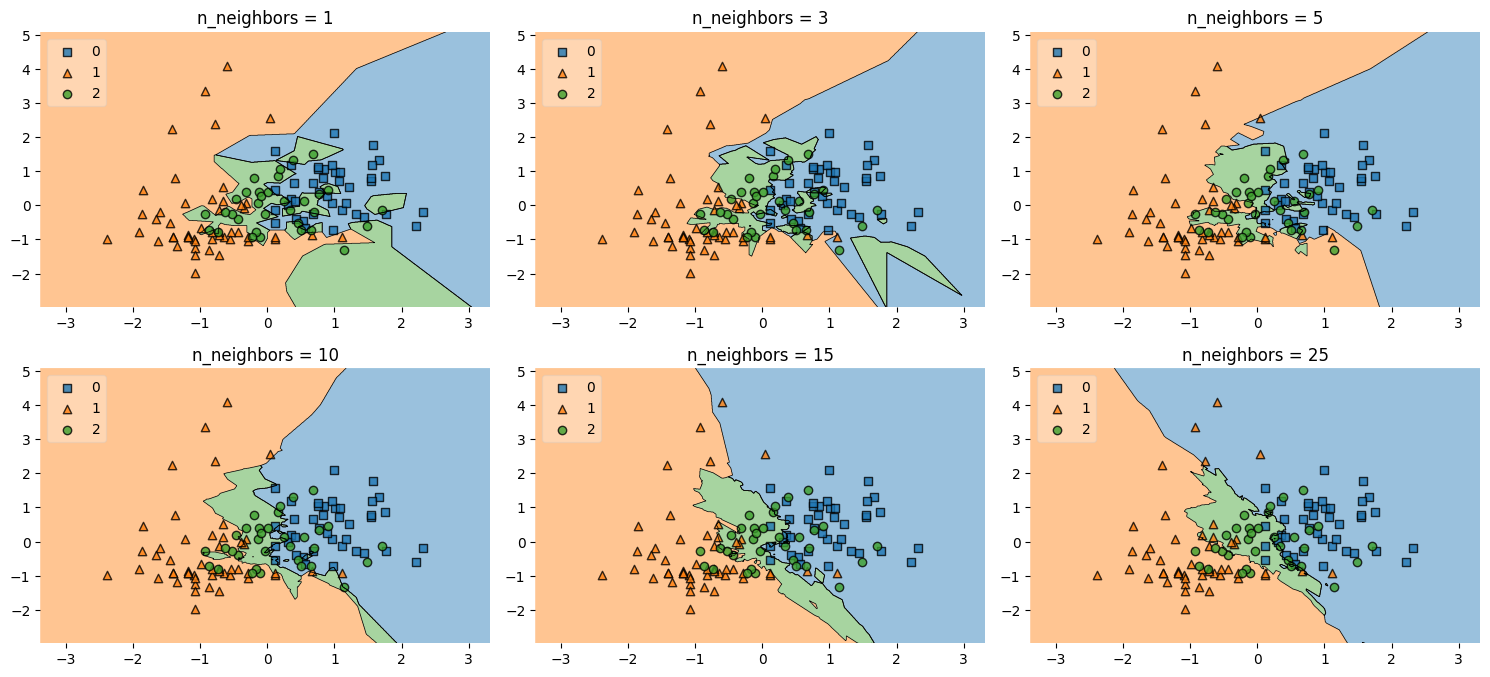

In [15]:
clf_list = [KNeighborsClassifier(n_neighbors=k, p=2) for k in neighbors]

gs = gridspec.GridSpec(3, 3)

fig = plt.figure(figsize=(15, 10))

labels = ['n_neighbors = 1', 'n_neighbors = 3', 'n_neighbors = 5', 
          'n_neighbors = 10', 'n_neighbors = 15', 'n_neighbors = 25']

for clf, lab, grd in zip(clf_list, labels, itertools.product([0, 1, 2], repeat=2)):
    clf.fit(X_train, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    plot_decision_regions(X=X_train, y=y_train, clf=clf, legend=2)
    plt.title(lab)

plt.tight_layout()
plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности. Какие из результатов явно говорят о переобучении модели? Почему?

`Вывод`: При k=1 модель переобучается, создавая сложные и неровные границы классов вокруг точек. При увеличении числа k границы становятся более сглаженными, но все еще остаются неровными. Наименьшая ошибка на тестовой выборке достигается при k=10 и k=5 (0.69 и 0.7 соотвественно). Можно также предположить, что лучшие результаты будут с числом k в промежутке от 5 до 10, но для это нужно провести дополнительные тесты 

### Задание 2. KNN своими руками. 2 Балла

В данном задании мы попробуем реализовать алгоритм KNN своими руками. В данном случае мы попробуем сделать KNN для классификации.

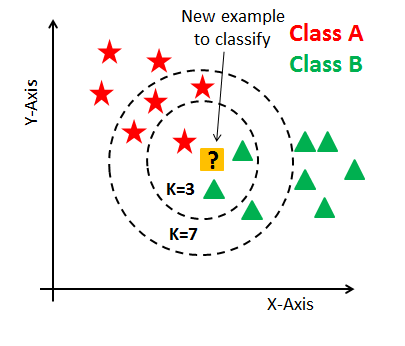

In [16]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k:int):
        self.k = k

    def fit(self, X, y):
        self.X_train = X # объект тернировочной выбоки 
        self.y_train = y # объект с классами 
        
    def predict(self, X):
        self.X_test = X # объект с тестовой выборкой 
        self.predictions = [self.predicted(x) for x in self.X_test] # применяем "предсказание" класса к каждому объекту тестовой выборки 
        return np.array(self.predictions)
    
    def predicted(self, x):
        distances = [self.count_distance(x, x_train) for x_train in self.X_train] # создаем список с расстояниями между имеющимися объектами и новыми "точками"
        index = np.argsort(distances)[:self.k] # сортируем и список с растояниями, выбирая ближайшие к новому объету, получаем индексы этих растояний и выбираем k-ближайших
        k_nearest_labels = [self.y_train[i] for i in index] # забираем классы этих k-ближайших точек
        most_common = Counter(k_nearest_labels).most_common(1) # получаем количество "вхождений" каждого класса среди k-ближайших
        return most_common[0][0] # выводим самый часто-встречающийся класс

    def count_distance(self, x, y):
        return np.sqrt(np.sum((x - y)**2)) # просчитываем Евклидово расстояние  

In [17]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [18]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [19]:
data = pd.read_csv('data/diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.2 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их.
Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [20]:
data.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [21]:
data = data.drop('Unnamed: 0', axis=1)

In [22]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**Задача 3.2 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [23]:
data_corr = data.corr(numeric_only=True) # матрица корреляций вещественных признаков 
data_corr

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


In [24]:
data_corr['price'] # выборочные корреляции между вещественными признаками и целевой переменной

carat    0.921591
depth   -0.010647
table    0.127134
price    1.000000
x        0.884435
y        0.865421
z        0.861249
Name: price, dtype: float64

`Вывод`: Таргет сильно коррелирует с каратом, что логично, учитывая, что это является одной из ключевых характеристик, определяющих цену бриллианта

Кроме того, можно отметить сильную корреляцию между переменными `x`, `y` и `z`, что также ожидаемо, учитывая, что они отражают размеры бриллианта: увеличение одного измерения обычно соответствует увеличению других (больше размер, больше вес) 

**Задача 3.3 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [25]:
data_dum = pd.get_dummies(data, drop_first=True, dtype = float)
data_dum.head()

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


**Задача 3.4 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3. Не забудьте про параметр `stratify`.

In [26]:
X = data_dum.drop('price', axis=1)
y = data_dum['price'][X.index]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=45)

**Задача 3.5 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [28]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

**Задача 3.6 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [29]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler

In [30]:
lr = LinearRegression().fit(X_train, y_train)

print(f"Train: {mean_squared_error(y_train, lr.predict(X_train))}")
print(f"Test: {mean_squared_error(y_test, lr.predict(X_test))}")

Train: 1286525.2934914795
Test: 1259238.4960903903


**Задача 3.7 (0.2 балла)** Изучите [документацию](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [31]:
lr.coef_

array([ 5.25217483e+03, -8.77497044e+01, -5.97162606e+01, -1.03063298e+03,
       -2.41383771e+00, -3.86632261e+01,  1.63837168e+02,  4.04377905e+02,
        3.29101854e+02,  2.94091023e+02, -7.84113969e+01, -1.03568318e+02,
       -1.94779160e+02, -3.54301687e+02, -4.36383334e+02, -5.25440950e+02,
        9.58809694e+02,  1.58264028e+03,  1.01571954e+03,  1.64943505e+03,
        1.80196224e+03,  1.25131345e+03,  1.46198794e+03])

In [32]:
data_non_object = data.select_dtypes(exclude=['object']).columns.tolist()
index = [data.columns.get_loc(i) for i in data_non_object]

In [33]:
res = [lr.coef_[i] for i in index]
res

[5252.174827361508,
 -2.4138377055929223,
 -38.66322609949725,
 163.83716774868356,
 404.37790453023797,
 329.10185426652373,
 294.09102309386475]

Оценка коэффициентов карата на порядок превышает оценки прочих вещественных переменных

**Задача 3.8 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом.

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией.

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [34]:
lasso = Lasso(10).fit(X_train, y_train)
ridge = Ridge(10).fit(X_train, y_train)

In [35]:
print('Lasso')
print(lasso.coef_)

Lasso
[4746.5035312   -96.09166646  -71.98468516 -576.54393595   -0.
  -34.03662058   39.16213331  195.9753047   141.53698195  121.91258564
   -7.49568791  -37.65199592 -116.66892301 -282.21625047 -364.81154354
 -465.77659741  660.25417369  881.944651    412.64299705 1058.57260534
 1120.70800604  841.56658857  980.66341306]


In [36]:
print('Ridge')
print(ridge.coef_)

Ridge
[ 5.21381335e+03 -8.60156198e+01 -5.99164421e+01 -9.88761781e+02
 -4.72944246e+00 -4.19507838e+01  1.64489043e+02  4.05611400e+02
  3.30200214e+02  2.95485954e+02 -7.80370433e+01 -1.03432486e+02
 -1.94248989e+02 -3.53491487e+02 -4.35136879e+02 -5.24162408e+02
  9.46974636e+02  1.55345670e+03  9.91065926e+02  1.62515462e+03
  1.77378015e+03  1.23486954e+03  1.44239882e+03]


`Вывод:` Гребневая регрссия (`Ridge`) почти не изменила коэффициенты по сравнению с коэффициентами линейной регрессии. В свою очередь, Лассо регрессия (`Lasso`) занулила или сильно уменьшила столбцы, которые сильно кореллировали между собой, то есть она нагляднее указывает на мультиклениарность в линейной регресии 

**Задача 3.9 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов.

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

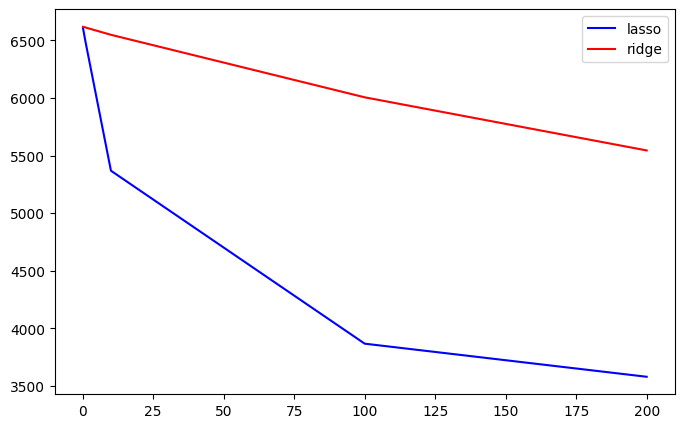

In [39]:
alpha = [0.1, 1, 10, 100, 200]
lasso = []
ridge = []

for parametr in alpha:
    lasso_new = Lasso(parametr).fit(X_train, y_train)
    ridge_new = Ridge(parametr).fit(X_train, y_train)
    
    lasso.append(np.linalg.norm(lasso_new.coef_))
    ridge.append(np.linalg.norm(ridge_new.coef_))

fig = plt.figure(figsize=(8, 5))
plt.plot(alpha, lasso, label='lasso', color='blue')
plt.plot(alpha, ridge, label='ridge', color='red')

plt.legend()
plt.show()

`Вывод`: Из графика наглядно видно, что `Lasso-регрессия` агрессивнее уменьшает веса,  заметны резкие наклоны, при этом `Ridge-регрессия` просто имеет небольшой наклон 

Именно Lasso-регрессию будут чаще исбользовать для отбора признаков, так как этот регулятор основан на сумме квадратов весов и штрафует именно большие веса 

**Задача 3.10 (0.5 балла)**
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке.

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`.

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество.

In [40]:
from sklearn.linear_model import LassoCV

In [42]:
lasso_cv = LassoCV(alphas=alpha, cv=5, tol=0.01).fit(X_train, y_train)
best_alpha = lasso_cv.alpha_
best_alpha

1.0

**Задача 3.11 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [43]:
lasso_final = Lasso(best_alpha).fit(X_train, y_train)
print(lasso_final.coef_)

[5201.43215869  -88.52906958  -60.92343205 -986.98958948   -0.
  -38.41504238  151.45319257  383.70501812  310.51098582  276.99284704
  -71.32317412  -96.98252683 -186.96984739 -347.09778531 -429.22441969
 -519.47020019  928.57348121 1511.67794017  954.64505242 1589.6082215
 1732.979213   1209.82522534 1413.25302217]


Оптимальный параметр для Lasso 0.1 - это достатоно небольшое значение, следовательно штрафы были небольшие, из-за чего оценки коэффициентов не сильно отличаются от результатов линейной регресии. Из чего мы также можем предположить, что проблема мультиколлинеарности не оказывает сильного влияния на результаты. Признаки, получившие 0, являются неинформативными, в даном случаи это `y`,  `z`, `table` и `depth`.

**Задача 3.12 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [44]:
y_final_test = lasso_final.predict(X_test)

print(f"Linal: {mean_squared_error(y_test, lr.predict(X_test))}")
print(f"Lasso: {mean_squared_error(y_test, y_final_test)}")

Linal: 1259238.4960903903
Lasso: 1260547.9636326823


`Вывод:` В данном случаи линейная регерессия показывает меньшую ошибку и лучше использовать её, возможно это может быть связано с тем, что Лассо штрафует большие значения, которые в данному случаи не будут выбросами или чем-то ненужным. При этом разница крайне маленькая (~1000)